In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [7]:
df = pd.read_csv('/Users/kaciechong/Desktop/Ethnicity.csv')
df

,Unnamed: 0,UC Percentage along Dimension,UCEAP Percentage along Dimension,UCEAP vs UC PP Diff along Dimension
0,African American/Black,2%,2%,0 pp
1,American Indian/Alaska Native,0%,0%,0 pp
2,Asian,30%,29%,▼1 pp
3,Hispanic/Latinx,26%,18%,▼8 pp
4,Native Hawaiian/Pacific Islander,0%,0%,0 pp
5,White,21%,34%,▲13 pp
6,Multiracial,6%,6%,0 pp
7,Domestic Unknown,2%,5%,▲3 pp
8,Non-Resident International,12%,5%,▼7 pp


In [8]:
df = df.rename(columns={'Unnamed: 0': 'Ethnicity'})
df = df.rename(columns={'UCEAP Percentage along Dimension': 'UCEAP Percentage'})
df = df.drop('UC Percentage along Dimension', axis=1)
df = df.drop('UCEAP vs UC PP Diff along Dimension', axis=1)
df = df.drop(1)
df = df.drop(4)

df

,Ethnicity,UCEAP Percentage
0,African American/Black,2%
2,Asian,29%
3,Hispanic/Latinx,18%
5,White,34%
6,Multiracial,6%
7,Domestic Unknown,5%
8,Non-Resident International,5%


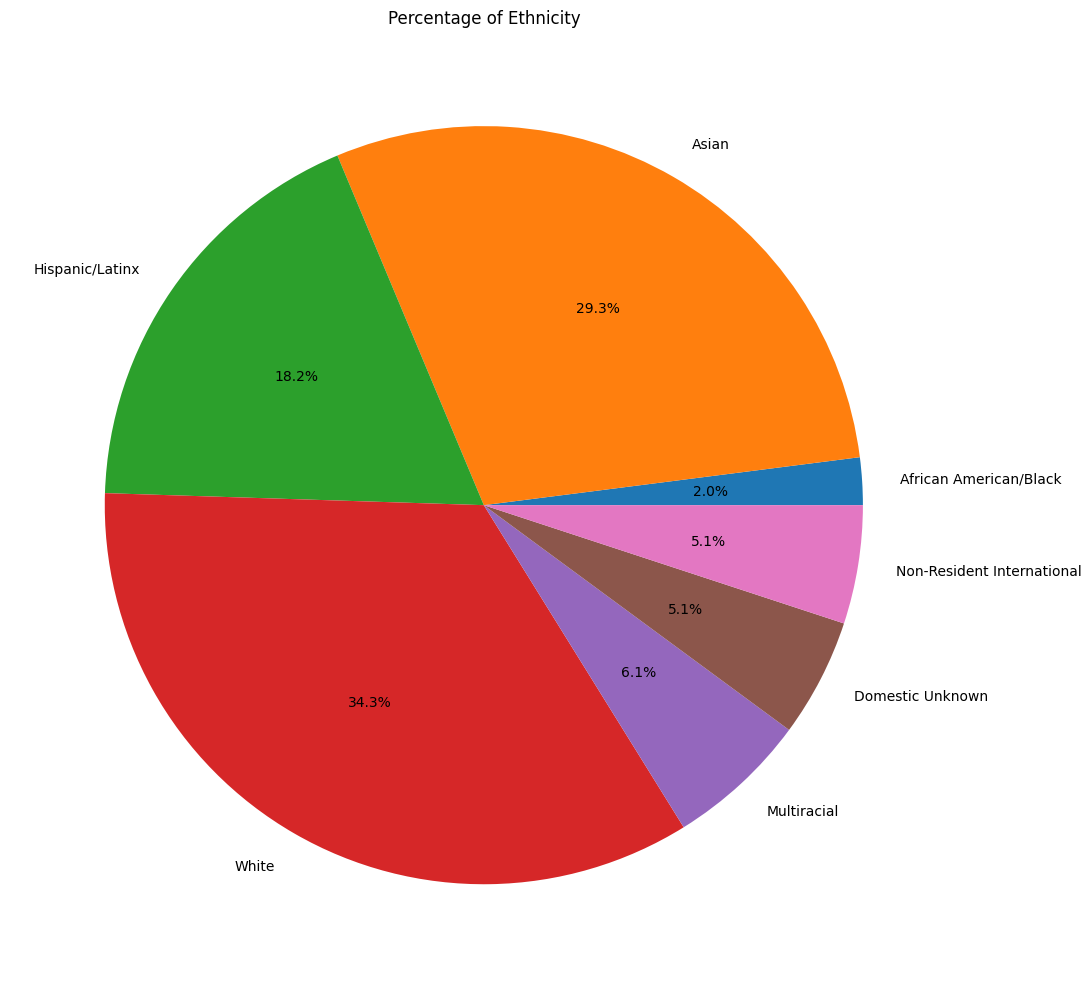

In [9]:
df['UCEAP Percentage'] = df['UCEAP Percentage'].replace({'%': '', ',': ''}, regex=True).astype(float)

plt.figure(figsize=(12, 10))
df.set_index('Ethnicity')['UCEAP Percentage'].plot(kind='pie', autopct='%1.1f%%', legend=False)

plt.title("Percentage of Ethnicity")

plt.ylabel('')  # To hide the y-axis label
plt.tight_layout()  
desktop = os.path.join(os.path.expanduser('~'), 'Desktop')

save_path = os.path.join(desktop, 'Ethnicity.png')

# Save the figure
plt.savefig(save_path, dpi=300)